# Changing directory structure

In [54]:
import os
import shutil
import glob

In [55]:
train_dir= r"C:\Users\inesa\Desktop\Cours\Semestre 3\DL\arabic_handwritten_data\data\train_data"

In [56]:
test_dir=r"C:\Users\inesa\Desktop\Cours\Semestre 3\DL\arabic_handwritten_data\data\test_data"

In [57]:
arabic_mnist_labels= ['alef', 'beh', 'teh', 'theh', 'jeem', 'hah', 'khah', 'dal', 'thal',
                    'reh', 'zain', 'seen', 'sheen', 'sad', 'dad', 'tah', 'zah', 'ain',
                    'ghain', 'feh', 'qaf', 'kaf', 'lam', 'meem', 'noon', 'heh', 'waw', 'yeh']

In [58]:
def movefile(srcDir, dstDir, i ):
    # Check if both the are directories
    if os.path.isdir(srcDir) and os.path.isdir(dstDir) :
        # Iterate over all the files in source directory
        for filePath in glob.glob(srcDir + '\*_label_'+ str(i+1)+'.png'):
            # Move each file to destination Directory
            shutil.move(filePath, dstDir);
    else:
        print("srcDir & dstDir should be Directories")

In [46]:
for i in range(len(arabic_mnist_labels)):
    directory= arabic_mnist_labels[i]
    path= os.path.join(train_dir, directory)
    path2= os.path.join(test_dir , directory)
    os.mkdir(path) 
    os.mkdir(path2)
    movefile(train_dir,path,i)  
    movefile(test_dir,path2,i)

NameError: name 'arabic_mnist_labels' is not defined

In [59]:
alef="alef"
alef_dir=os.path.join(train_dir,alef)
print('total training rock images:', len(os.listdir(alef_dir)))

total training rock images: 480


In [60]:
beh="beh"
beh_dir=os.path.join(train_dir,beh)
print('total training rock images:', len(os.listdir(beh_dir)))

total training rock images: 480


In [61]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

In [62]:
alef_files = os.listdir(alef_dir)

beh_files = os.listdir(beh_dir)


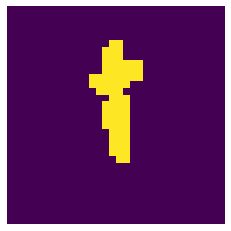

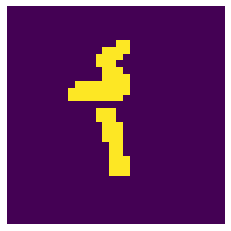

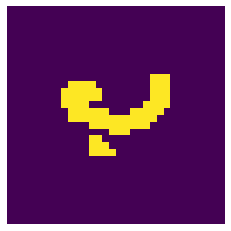

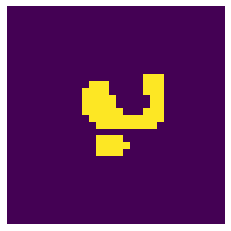

In [63]:
next_alef = [os.path.join(alef_dir, fname) 
                for fname in alef_files[pic_index-2:pic_index]]
next_beh = [os.path.join(beh_dir, fname) 
                for fname in beh_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_alef+next_beh):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

# With Data Augmentation

In [64]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [11]:
TRAINING_DIR = "C:/Users/inesa/Desktop/Cours/Semestre 3/DL/arabic_handwritten_data/data/train_data/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "C:/Users/inesa/Desktop/Cours/Semestre 3/DL/arabic_handwritten_data/data/test_data/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 13440 images belonging to 28 classes.
Found 3360 images belonging to 28 classes.


In [12]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150,3 )),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(28, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

# Without Data Augmentation

In [65]:
# Python packages to manipulate files
import os
import pathlib
from pathlib import Path
import datetime
# Tensorflow and Numpy packages
import tensorflow as tf
import numpy as np

# Display related packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
import PIL
import PIL.Image


In [66]:
directory = "C:/Users/inesa/Desktop/data/train_data/"
images = os.listdir(dir)

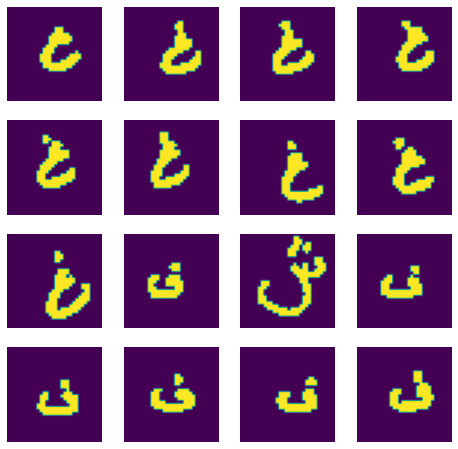

In [67]:
ncols = 4
nrows = 4

fig = plt.gcf()
fig.set_size_inches(ncols*2, nrows*2)

for i, img_path in enumerate(images[0:ncols*nrows]):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Disable axes display

    img = mpimg.imread(directory+img_path)
    plt.imshow(img)

plt.show()

In [68]:
batch_size = 32
img_height = 32
img_width = 32

def get_dataset(dataset_dir):
    
    def process_filename(file_path):
        label = tf.strings.regex_replace(input=file_path,pattern=r".+_label_(\d+)\.png", rewrite=r"\1")
        label = tf.strings.to_number(label, tf.int32)-1
        #label = tf.one_hot(label, depth=29)
        return label

    def process_img(file_path):

        img = tf.io.read_file(file_path)
        img = tf.image.decode_png(img, channels=3)
        img = tf.image.resize(img, size=(32, 32))
        img = tf.image.convert_image_dtype(img, tf.float32)
        img = tf.cast(img, tf.float32) / 255.0
        return img
    
    data_dir = pathlib.Path(dataset_dir)
    file_list = [str(path.absolute()) for path in Path(data_dir).glob("*.png")]
    files_ds = tf.data.Dataset.from_tensor_slices((file_list))
    files_ds = files_ds.map(lambda x: (process_img(x), process_filename(x)))
    return files_ds

In [69]:
train_dataset_path = "C:/Users/inesa/Desktop/data/train_data"
test_dataset_path = "C:/Users/inesa/Desktop/data/test_data"

train_ds = get_dataset(train_dataset_path).shuffle(buffer_size=batch_size*10).batch(batch_size)
valid_ds = get_dataset(test_dataset_path).batch(batch_size)

In [71]:
model2 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150,3 )),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(28, activation='softmax')
])





In [72]:
model2.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [73]:
model2.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model2.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 3 steps
Epoch 1/25
20/20 [==============================] - 142s 7s/step - loss: 3.3690 - accuracy: 0.0401 - val_loss: 3.2670 - val_accuracy: 0.1005
Epoch 2/25
20/20 [==============================] - 133s 7s/step - loss: 3.2656 - accuracy: 0.0770 - val_loss: 3.0255 - val_accuracy: 0.1772
Epoch 3/25
20/20 [==============================] - 124s 6s/step - loss: 3.1369 - accuracy: 0.0985 - val_loss: 2.6838 - val_accuracy: 0.2487
Epoch 4/25
20/20 [==============================] - 125s 6s/step - loss: 3.0193 - accuracy: 0.1329 - val_loss: 2.5425 - val_accuracy: 0.2275
Epoch 5/25
20/20 [==============================] - 135s 7s/step - loss: 2.9208 - accuracy: 0.1548 - val_loss: 2.4603 - val_accuracy: 0.3360
Epoch 6/25
20/20 [==============================] - 129s 6s/step - loss: 2.7824 - accuracy: 0.1913 - val_loss: 2.1997 - val_accuracy: 0.3862
Epoch 7/25
20/20 [==============================] - 133s 7s/ste

In [80]:

from keras.preprocessing import image

ModuleNotFoundError: No module named 'termios'

# The model on which we have applied data augmentation has a slightly smaller loss 

# Predicting 

In [89]:
import numpy as np


In [ ]:

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)